This file is located at: https://github.com/morphware/ethdenver/blob/main/Sample_Image_Classification_Model.ipynb

If you need help getting set-up, please let us know on the ETH Denver channel of our Discord server (https://discord.gg/4WjXawXDRf).

#### Import Dependicies

In [1]:
import tensorflow as     tf

from   tensorflow import keras

## Pre-processing
### Train-test Split

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
validation_set_size     = 5000
maximum_pixel_intensity = 255.0

In [4]:
X_valid, X_train = X_train_full[:validation_set_size] / maximum_pixel_intensity, X_train_full[validation_set_size:] / maximum_pixel_intensity
y_valid, y_train = y_train_full[:validation_set_size], y_train_full[validation_set_size:]
X_test           = X_test / maximum_pixel_intensity

### Categories

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### `keras` Callbacks

#### `Checkpoint` Callback

In [8]:
outfile_pathname  = 'trained_model.h5' 
checkpoint_cb     = keras.callbacks.ModelCheckpoint(outfile_pathname, save_best_only=True)

#### `EarlyStopping` Callback

In [9]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

## Processing
### Actual Training Process

In [10]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7175 - accuracy: 0.7659 - val_loss: 0.5100 - val_accuracy: 0.8260
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.8295 - val_loss: 0.4409 - val_accuracy: 0.8484
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4444 - accuracy: 0.8441 - val_loss: 0.4114 - val_accuracy: 0.8592
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4184 - accuracy: 0.8536 - val_loss: 0.4022 - val_accuracy: 0.8620
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8606 - val_loss: 0.4086 - val_accuracy: 0.8574
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3815 - accuracy: 0.8648 - val_loss: 0.3814 - val_accuracy: 0.8724
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3687 - accuracy: 0.8706 - val_loss: 0.3786 - val_accuracy:

## Post-processing
### Charting model accurracy

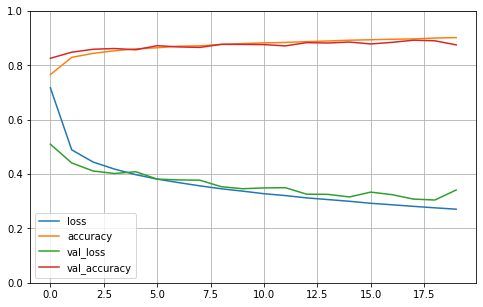

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()